<h3 style="background-color: #D3D92B;"><br>Numerical Optimisation. Project 1<br></h3><br>

<h3 style="background-color: #D3D92B;"><br>Team Information<br></h3><br>

<i>Group 08<br>
Participants information in alphabetical order</i>
<table style="width:100%">
  <
    <th style = "text-align: left">#</th>
    <th style = "text-align: left">Name</th>
    <th style = "text-align: left">Lastname</th>
    <th style = "text-align: left">Matr Number</th>
  </tr>
  <tr>
    <td style = "text-align: left">1</td>
    <td style = "text-align: left">Alexander</td>
    <td style = "text-align: left">Temper</td>
    <td style = "text-align: left">K11905007</td>
  </tr>
  <tr>
    <td style = "text-align: left">2</td>
    <td style = "text-align: left">Bernhard Michael</td>
    <td style = "text-align: left">Voggenberger</td>
    <td style = "text-align: left">K11907093</td>
  </tr>
  <tr>
    <td style = "text-align: left">3</td>
    <td style = "text-align: left">Christian</td>
    <td style = "text-align: left">Ganhör</td>
    <td style = "text-align: left">K11911652</td>
  </tr>
  <tr>
    <td style = "text-align: left">4</td>
    <td style = "text-align: left">Christoph</td>
    <td style = "text-align: left">Koller</td>
    <td style = "text-align: left">K11910272</td>
    </tr>
  <tr>
    <td style = "text-align: left">5</td>
    <td style = "text-align: left">Franziska</td>
    <td style = "text-align: left">Denk</td>
    <td style = "text-align: left">K11904292</td>
  </tr>
  <tr>
    <td style = "text-align: left">6</td>
    <td style = "text-align: left">Lukas</td>
    <td style = "text-align: left">Gattermayr</td>
    <td style = "text-align: left">K11911639</td>
  </tr>
  <tr>
    <td style = "text-align: left">7</td>
    <td style = "text-align: left">Nathanael</td>
    <td style = "text-align: left">Harmetzky</td>
    <td style = "text-align: left">K11916566</td>
  </tr>
  <tr>
    <td style = "text-align: left">8</td>
    <td style = "text-align: left">Raphael-Pascal</td>
    <td style = "text-align: left">Endstrasser</td>
    <td style = "text-align: left">K11907909</td>
  </tr>
  <tr>
    <td style = "text-align: left">9</td>
    <td style = "text-align: left">Tobias</td>
    <td style = "text-align: left">Stierberger</td>
    <td style = "text-align: left">K11907869</td>
  </tr>
  <tr>
    <td style = "text-align: left">10</td>
    <td style = "text-align: left">***</td>
    <td style = "text-align: left">***</td>
    <td style = "text-align: left">***</td>
  </tr>
</table>


<h3 style="background-color: #D3D92B;"><br>Implementation<br></h3><br>
<hr><h4 style="background-color: #ADB8FF;"><br>Imports<br></h4><br>
<i>Describe how to install additional packages, if you have some, here</i>


**Installing Python (you can probably skip this already if you have Python installed)**  
First you need to make sure, that you already have Python and pip installed, and that pip is up to date (run in terminal: #pip install --upgrade pip#). If you need to install it first, here is a guide for Windows: https://www.liquidweb.com/kb/install-pip-windows/ and on Ubuntu/Linux: first run #sudo apt-get install python3.9# and then #sudo apt install python3-pip#.
Then, you can install all packages via pip in the terminal. The necessary commands are given here:

* pip3 install numpy
* pip3 install scipy
* pip3 install matplotlib
* pip3 install seaborn
* pip3 install mpmath

You may also install the packages in the Python environment used by the Jupyter server, by executing the following code block.

In [1]:
# To immediately install the required packages in the Jupyter environment, uncomment and execute the following lines:

#!pip install numpy
#!pip install scipy
#!pip install matplotlib
#!pip install seaborn
#!pip install mpmath

### Imports

In [2]:
import numpy as np
import scipy 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# custom added imports
from typing import Callable, Tuple # only for typing, code readability
from dataclasses import dataclass  # only for typing, code readability
from mpmath import mp # for increasing floating-point precision

In [2]:
# automatically reloads imports periodically for seamless development
%load_ext autoreload
%autoreload 2

# custom imports
from src.classes import MinimizationProblemSettings
from src.problems import create_quadratic_problem, create_non_quadratic_problem
from src.minimization import find_minimizer
from src.methods.newton import newton_direction
from src.methods.steepest_descent import steepest_descent_direction
from src.methods.quasi_newton import bfgs_quasi_newton_direction
from src.methods.conjugate import fr_conjugate_direction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Settings for the notebook
We have implemented a settings object where you can enable certain new features for phase 2 of the project. We present it in the following code block. These settings will be used for the 10 main problems throughout the notebook.

In [4]:
# Settings for main quadratic and non-quadratic problems in this notebook
settings = MinimizationProblemSettings(
    # --- Settings that activate/deactive newly implemented features for phase 2 ---
    gradient_approximation_enabled = True,
    hessian_approximation_enabled = True,
    custom_matrix_inversion_enabled = True,
    # not activated, because our problems are not degenerated and this setting doesn't help there
    # we have a dedicated showcase for this feature to show that it works very well for degenerated problems
    variable_scaling_enabled = False,
    # not activated, as our problems aren't poorly scaled and we rather don't want to make sure
    # the tolerance is set correctly for each problem
    # we have a dedicated showcase for this feature to show that it works very well for scaled problems
    # if you activate this, be aware that you need to decrease the tolerance by at least 1e-5 
    # to ensure that we still get close solutions
    # (with a similar number of iterations, as our problems aren't poorly scaled)
    advanced_stopping_criteria_enabled = False, 

    # --- Settings that adapt the minimization problem creation, mostly for showcases later, should not be adapted here ---
    degenerate_problem = False, # no degeneration for default problems
    scale_problem = False # no scaling for default problems
)

<hr><h4 style="background-color: #ADB8FF;"><br>Stopping criteria<br></h4><br>
<i>Place for additional comments and argumentation<i>


### Reasoning

We implemented the new stopping criteria as described in the pdf and showcase them below in the section of quadratic problems for a small problem, that we deliberately scale by $10^5$. We followed the suggestion to make them relative to the first iterate such that scaled problems work well.

The code is located at **src/stopping_criterion.py**

<hr><h4 style="background-color: #ADB8FF;"><br>Variables scaling<br></h4><br>
<i>Place your reasoning here, how your algorithm behave with respect to this problem. You can also try rescaling your problems
This is additional task, which can earn you several points.<i>

### Reasoning

We argue that our problems are not poorly scaled and therefore perform pretty well with regards to variable scaling. In particular, we implemented variable scaling for quadratic problems and it doesn't really help much for our problems.
However, we implemented a showcase problem and show it below in the section of quadratic problems for a small problem (for steepest descent). You can try to deactivate the option 'variable_scaling_enabled' to see that it takes a lot longer for steepest descent to converge if we don't scale the variables. The method we implemented is called the Ruiz algorithm and presented in https://arxiv.org/abs/1610.03871 (Algorithm 2).

The code is located at **src/scaling.py**

<hr><h4 style="background-color: #ADB8FF;"><br>Stabilising algorithm<br></h4><br>
<i>Place your reasoning here, how your algorithm behave with respect to this problem. You can also try rescaling your problems
This is additional task, which can earn you several points.<i>

### Reasoning
We implemented rescaling for quadratic problems in the context of variable scaling and have measures that we could take against floating-point instability, if we had problems with such issues (mpmath, see next section). Furthermore, we are using the gaussian elimination with row partial pivoting as a stable method to calculate the inverse instead of other unstable methods such as standard gaussian elimination (see matrix inversion section).


<hr><h4 style="background-color: #ADB8FF;"><br>Fighting floating-point numbers and roundoff error<br></h4><br>
<i>Place your reasoning, how your algorithm behave with respect to this problem. You can also try rescaling your problems
This is additional task, which can earn you several points.<i>

To solve the floating point / rounding problem we tried to use libraries that enable us to perform calculations with more precision. One of these libraries is [**mpmath**](https://mpmath.org/), which supports real and complex floating-point arithmetic with arbitrary precision. It can easily be installed in the terminal by running ```pip install mpmath```. Further setup information is available [here](https://mpmath.org/doc/current/setup.html#setting-up-mpmath).

In [6]:
# sets the decimal points precision that we want to have when performing floating-point arithmetic with the mpmath library
# just for demonstration, by now not used anymore (see reasoning below)
mp.dps = 42

As the precision is arbitrary, the user may choose it to fulfill specific needs. We can either choose to set the binary precision (prec) or the decimal places (dps) we want to have. For this project, we use the latter and set it as in the code block above.

This setting is used throughout the entire project. Therefore, performing an arithmetic operation rounds the result to this precision. Again, further information can be found in the libraries documentations: https://mpmath.org/doc/current/basics.html?highlight=dps#setting-the-precision.

Although in principle this sounded like a good idea, using higher precision for calculations also means longer execution times. Especially for mpmath, which does not seem to be built for fast calculations, this lead to **LONG** execution times, and therefore we discontinued our all-mpmath approach.

In general, we are able to solve our problems well without bigger adaptions to floating-point arithmetic, as they seem to be well-conditioned, due to no significant difference in the number of minimization iterations when executed with a very high precision through mpmath.

Additionally, to be safe, we ensure that no steps from $x_k$ to $x_{k+1}$ are taken which are below the precision of our floating-point arithmetic, such that we don't run into infinite loops.

<hr><h4 style="background-color: #ADB8FF;"><br>Inverting matrices<br></h4><br>
<i>Place for additional comments and argumentation<i>

### Reasoning

We implemented the matrix inversion using an LU decomposition with partial pivoting (LUP), as described in Algorithm A.1 in the book and https://en.wikipedia.org/wiki/LU_decomposition.



In [7]:
#your function for invertion goes here

# TODO paste code from src/matrix_inversion.py

<hr><h4 style="background-color: #ADB8FF;"><br>Gradients calculation<br></h4><br>
<i>Place for additional comments and argumentation<i>

### Reasoning
We implemented gradient and hessian approximation as described in the book in section 8.1. 
As we have a dedicated data class which holds our minimization problem, we implemented the approximation within this data class as gradient approximation is independent of the minimization method and all that we need is part of the minimization problem.

In [8]:
#your function for gradient approximation goes here

# TODO paste either MinimizationProblem entirely or standalone function which currently resides in MinimizationProblem#calc_gradient_at
# (located in src/classes.py)

<hr><h4 style="background-color: #ADB8FF;"><br>Additional objects you implemented<br></h4><br>
<i>Place for additional comments and argumentation<i>

In [9]:
def plot_grad_norms(problem_grad_norms):
    """
    Plots the evolution of the gradient norms over the iterations for the minimized problems.

    :param problem_grad_norms: List of gradient-L2-norm-per-iteration lists over problems
    """
    for i, grad_norms in enumerate(problem_grad_norms):
        plt.plot(range(len(grad_norms)), grad_norms, label=f"Problem {i+1}")

    plt.title("Gradient evolution")
    plt.xlabel("Iterations")
    plt.ylabel("Gradient L2 norm")
    plt.legend()
    plt.show()

In [10]:
#your code goes here

# TODO paste code from src/classes.py (except MinimizationProblem if inserted earlier)

<hr><h4 style="background-color: #ADB8FF;"><br>Optimising algorithm itself<br></h4><br>
<i>Place for additional comments and argumentation<i>

In [11]:
#your code goes here

# TODO paste code from src/minimization.py
# TODO paste code from src/methods/*.py

<h3 style="background-color: #D3D92B;"><br>Testing on 5-10 variables, Quadratic objective<br></h3><br>
<hr><h4 style="background-color: #ADB8FF;"><br>Implement functions to optimise over<br></h4><br>
<i>Place for additional comments and argumentation<i>

In [12]:
#your code goes here

# TODO paste code from src/problems.create_quadratic_problem

np.random.seed(41) # reproducability

# Take N random values of n for matrix/vector size of quadratic problem
N = 5
n_values = np.random.randint(low=10, high=21, size=N)

# Create actual quadratic problems for dimensionalities n in n_values
quadratic_problems = [create_quadratic_problem(n, settings=settings) for n in n_values]

<hr><h4 style="background-color: #ADB8FF;"><br>Run 5 tests<br></h4><br>
<p><b>Note:</b> After every test print out the resulsts. 
<br>For your convinience we implemented a function which will do it for you. Function can be used in case after running optimisation you return $x_{optimal}$, and if you have implemented your gradient approximation. Feel free to bring your adjustments.
<br> Additionaly print how many iterations your algotithm needed. You might also provide charts of your taste (if you want).
<p><i>Place for your additional comments and argumentation<i>

In [13]:
def final_printout(x_0,x_optimal,x_appr,f,grad,tolerance, **kwargs):
    """
    Parameters
    --------------------------------------------------------------------------------------------------------------
    x_0: numpy 1D array, corresponds to initial point
    x_optimal: numpy 1D array, corresponds to optimal point, which you know, or have solved analytically
    x_appr: numpy 1D array, corresponds to approximated point, which your algorithm returned
    --------------------------------------------------------------------------------------------------------------
    f: function which takes 2 inputs: x (initial, optimal, or approximated)
                                      **args
       Function f returns a scalar output.
    --------------------------------------------------------------------------------------------------------------
    grad: function which takes 3 inputs: x (initial, optimal, or approximated), 
                                         function f,
                                         args (which are submitted, because you might need
                                              to call f(x,**args) inside your gradient function implementation). 
          Function grad approximates gradient at given point and returns a 1d np array.
    --------------------------------------------------------------------------------------------------------------
    args: dictionary, additional (except of x) arguments to function f
    tolerance: float number, absolute tolerance, precision to which, you compare optimal and approximated solution.
    """
    
    print(f'Initial x is :\t\t{x_0}')
    print(f'Optimal x is :\t\t{x_optimal}')
    print(f'Approximated x is :\t{x_appr}')
    print(f'Is close verification: \t{np.isclose(x_appr,x_optimal,atol=tolerance)}\n')
    f_opt = f(x_optimal,**kwargs)
    f_appr = f(x_appr,**kwargs)
    print(f'Function value in optimal point:\t{f_opt}')
    print(f'Function value in approximated point:   {f_appr}')
    print(f'Is close verification:\t{np.isclose(f_opt,f_appr,atol=tolerance)}\n')
    print(f'Gradient approximation in optimal point is:\n{grad(x_optimal,**kwargs)}\n')
    grad_appr = grad(x_appr,**kwargs)
    print(f'Gradient approximation in approximated point is:\n{grad_appr}\n')
    print(f'Is close verification:\n{np.isclose(grad_appr,np.zeros(grad_appr.shape),atol=tolerance)}')

In [14]:
def execute_quadratic_minimization(problems, direction_method, plot_gradients=True):
    """
    Executes the minimization procedure for the given direction method (e.g. steepest descent)
    for all given quadratic problems. Prints the minimization results and plots the gradients.

    :param problems: List of quadratic MinimizationProblem instances that we want to minimize
    :param direction_method: Callable that implements the calculation of the direction for an iteration (e.g. steepest descent)
    :return: gradients of problem minimization procedure
    """

    print("Starting minimization procedure for quadratic problems ...")

    problems_grad_norms = []

    for i, problem in enumerate(problems):
        print(f"\n\n### Evaluating quadratic problem {i+1} ###\n")
        
        # We perform the actual minimization procedure
        x_minimizer, grad_norms = find_minimizer(problem, direction_method, tolerance=1e-3, max_iter=300_000)
        problems_grad_norms.append(grad_norms)
        
        # Print the result
        final_printout(problem.x0, problem.solution, x_minimizer, problem.f, problem.calc_gradient_at, tolerance=1e-2)
        print(f"\nIterations required: {len(grad_norms)}")
    
    if plot_gradients:
        plot_grad_norms(problems_grad_norms)
    
    return problems_grad_norms

# Variable scaling showcase (steepest descent)

We generate a quadratic problem of dimensionality 2, where the matrix A is scaled by the factor 100 in its first row and column, to sort of mock degeneration of the problem. We showcase the variable scaling by solving the minimization of this problem once with variable scaling and once without and plotting the number of iterations.

Showcase: with variable scaling
Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

Initial x is :		[0. 0.]
Optimal x is :		[7 6]
Approximated x is :	[7.         6.00000003]
Is close verificaion: 	[ True  True]

Function value in optimal point:	-519922.0
Function value in approximated point:   -519922.00000000006
Is close verification:	True

Gradient approximation in optimal point is:
[0. 0.]

Gradient approximation in approximated point is:
[-1.74951856e-06  6.66195774e-08]

Is close verificaion:
[ True  True]

Iterations required: 1973



Showcase: without variable scaling
Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

No handles with labels found to put in legend.
Initial x is :		[0. 0.]
Optimal x is :		[7 6]
Approximated x is :	[7.00000782 5.99978984]
Is close verificaion: 	[ True  True]

Function value in optimal point:	-519922.0
Function value in approximated point:   -519921.99

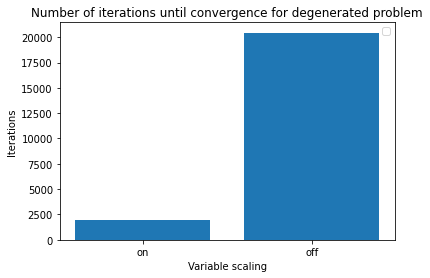

In [15]:
# --- Var scaling on ---
 
var_scaling_on_settings = MinimizationProblemSettings(
    gradient_approximation_enabled = False,
    hessian_approximation_enabled = False,
    custom_matrix_inversion_enabled = False,
    variable_scaling_enabled = True, # enables var scaling
    advanced_stopping_criteria_enabled = False,
    degenerate_problem = True # ensures that we get a degenerated problem where the first row/column of A is a lot larger than the others
) 

# Create small showcase problem
np.random.seed(50) # ensure deterministic problem
with_var_scaling_small_problem = create_quadratic_problem(2, settings=var_scaling_on_settings)

# Execute minimization procedure with var scaling and without to be able to compare number of iterations
print("Showcase: with variable scaling")
gradients_with_var_scaling = execute_quadratic_minimization(np.array([with_var_scaling_small_problem]), steepest_descent_direction, False)
print("\n\n")

# --- Var scaling off ---

var_scaling_off_settings = MinimizationProblemSettings(
    gradient_approximation_enabled = False,
    hessian_approximation_enabled = False,
    custom_matrix_inversion_enabled = False,
    variable_scaling_enabled = False, # disables var scaling
    advanced_stopping_criteria_enabled = False,
    degenerate_problem = True # ensures that we get a degenerated problem where the first row/column of A is a lot larger than the others
) 

# Create small showcase problem
np.random.seed(50) # ensure deterministic problem
without_var_scaling_small_problem = create_quadratic_problem(2, settings=var_scaling_off_settings)

print("Showcase: without variable scaling")
gradients_without_var_scaling = execute_quadratic_minimization(np.array([without_var_scaling_small_problem]), steepest_descent_direction, False)

# --- Plotting ---
plt.bar(range(2), [len(gradients_with_var_scaling[0]), len(gradients_without_var_scaling[0])], align='center')
plt.xticks(range(2), ("on", "off"))
plt.title("Number of iterations until convergence for degenerated problem")
plt.xlabel("Variable scaling")
plt.ylabel("Iterations")
plt.legend()
plt.show()

# Advanced stopping criteria showcase (steepest descent)

We generate a quadratic problem of dimensionality 2 and scale the quadratic function $f$ by $10^5$, i.e., the function that we want to minimize on is $g(x)=10^5 f(x)$. We showcase the power of the advanced stopping criteria, that use the relative gradient, the relative difference of function values and the relative difference of input values by minimizing this problem once with advanced stopping criteria and once without (only with a gradient norm smaller than tolerance check).

Showcase: with advanced (relative, multiple) stopping criteria
Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

ratio of gradients too small: 62.660861794651176
Initial x is :		[0. 0.]
Optimal x is :		[1 1]
Approximated x is :	[0.99812981 1.00144329]
Is close verificaion: 	[ True  True]

Function value in optimal point:	-4500000.0
Function value in approximated point:   -4499999.944854334
Is close verification:	True

Gradient approximation in optimal point is:
[0. 0.]

Gradient approximation in approximated point is:
[-4.07781384 71.13248181]

Is close verificaion:
[False False]

Iterations required: 505



Showcase: without advanced (relative, multiple) stopping criteria
Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

No handles with labels found to put in legend.
Initial x is :		[0. 0.]
Optimal x is :		[1 1]
Approximated x is :	[1. 1.]
Is close verificaion: 	[ True  True]

Functio

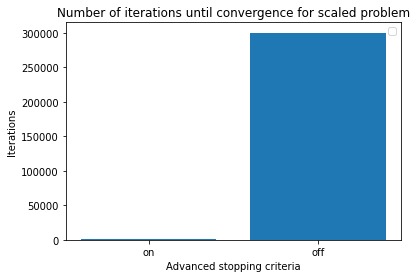

In [16]:
# --- Advanced stopping criteria on ---

adv_stop_criteria_on_settings = MinimizationProblemSettings(
    gradient_approximation_enabled = False,
    hessian_approximation_enabled = False,
    custom_matrix_inversion_enabled = False,
    variable_scaling_enabled = False, 
    advanced_stopping_criteria_enabled = True, # enables advanced stopping criteria
    degenerate_problem = False,
    scale_problem = True # ensures a scaled problem where advanced stopping criteria shines
) 

# Create small showcase problem
np.random.seed(48) # ensure deterministic problem
with_adv_stop_criteria_small_problem = create_quadratic_problem(2, settings=adv_stop_criteria_on_settings)

print("Showcase: with advanced (relative, multiple) stopping criteria")
gradients_with_adv_stop_criteria = execute_quadratic_minimization(np.array([with_adv_stop_criteria_small_problem]), steepest_descent_direction, False)
print("\n\n")

# --- Advanced stopping criteria off ---

adv_stop_criteria_off_settings = MinimizationProblemSettings(
    gradient_approximation_enabled = False,
    hessian_approximation_enabled = False,
    custom_matrix_inversion_enabled = False,
    variable_scaling_enabled = False,
    advanced_stopping_criteria_enabled = False,  # disables advanced stopping criteria
    degenerate_problem = False,
    scale_problem = True  # ensures a scaled problem where advanced stopping criteria shines
) 

# Create small showcase problem
np.random.seed(48) # ensure deterministic problem
without_adv_stop_criteria_small_problem = create_quadratic_problem(2, settings=adv_stop_criteria_off_settings)

print("Showcase: without advanced (relative, multiple) stopping criteria")
gradients_without_adv_stop_criteria = execute_quadratic_minimization(np.array([without_adv_stop_criteria_small_problem]), steepest_descent_direction, False)

# --- Plotting ---
plt.bar(range(2), [len(gradients_with_adv_stop_criteria[0]), len(gradients_without_adv_stop_criteria[0])], align='center')
plt.xticks(range(2), ("on", "off"))
plt.title("Number of iterations until convergence for scaled problem")
plt.xlabel("Advanced stopping criteria")
plt.ylabel("Iterations")
plt.legend()
plt.show()

# Steepest descent


Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is :		[4 3 4 2 1 3 8 2 2 2]
Approximated x is :	[3.9993169  3.00919335 4.00235047 1.99932536 0.99670882 2.99785863
 7.99158107 2.00196913 1.99681644 2.00416458]
Is close verificaion: 	[ True  True  True  True  True  True  True  True  True  True]

Function value in optimal point:	-113172.5
Function value in approximated point:   -113172.49999004169
Is close verification:	True

Gradient approximation in optimal point is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Gradient approximation in approximated point is:
[-0.00146484  0.         -0.00146484 -0.00292969 -0.00244141 -0.00195312
 -0.00195312 -0.00195312 -0.00244141 -0.00097656]

Is close verificaion:
[ True  True  True  True  True  True  True  True  True  True]

Iterations required: 52706


### Evaluating quadratic problem 2 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
O

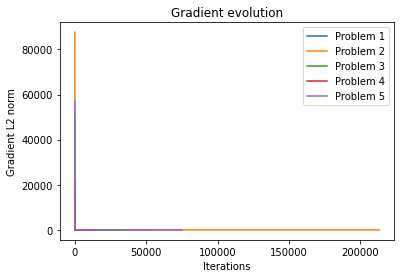

In [17]:
#your code goes here

_ = execute_quadratic_minimization(quadratic_problems, steepest_descent_direction)

# Quasi-Newton

Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is :		[4 3 4 2 1 3 8 2 2 2]
Approximated x is :	[4.00013502 2.99831661 3.99959563 2.00011864 1.00061078 3.00036543
 8.00155346 1.99962421 2.0005894  1.99922055]
Is close verificaion: 	[ True  True  True  True  True  True  True  True  True  True]

Function value in optimal point:	-113172.5
Function value in approximated point:   -113172.4999996493
Is close verification:	True

Gradient approximation in optimal point is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Gradient approximation in approximated point is:
[ 0.00048828  0.00048828  0.          0.00048828  0.00048828  0.
 -0.00048828  0.          0.00097656 -0.00048828]

Is close verificaion:
[ True  True  True  True  True  True  True  True  True  True]

Iterations required: 40


### Evaluating quadratic problem 2 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is 

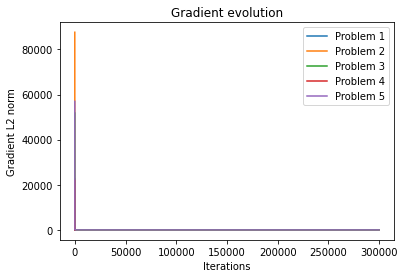

In [18]:
#your code goes here

_ = execute_quadratic_minimization(quadratic_problems, bfgs_quasi_newton_direction)

# Newton

In [19]:
#your code goes here

_ = execute_quadratic_minimization(quadratic_problems, newton_direction)

Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is :		[4 3 4 2 1 3 8 2 2 2]
Approximated x is :	[4. 3. 4. 2. 1. 3. 8. 2. 2. 2.]
Is close verificaion: 	[ True  True  True  True  True  True  True  True  True  True]

Function value in optimal point:	-113172.5
Function value in approximated point:   -113172.50000000003
Is close verification:	True

Gradient approximation in optimal point is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Gradient approximation in approximated point is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Is close verificaion:
[ True  True  True  True  True  True  True  True  True  True]

Iterations required: 2


### Evaluating quadratic problem 2 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is :		[2 4 3 8 4 9 7 8 5 9 4 2 4]
Approximated x is :	[2. 4. 3. 8. 4. 9. 7. 8. 5. 9. 4. 2. 4.]
Is close verificaion: 	[ True  True  True  True  True  True  True  True 

ValueError: 'A' must be non-singular

# Conjugate method

Starting minimization procedure for quadratic problems ...


### Evaluating quadratic problem 1 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is :		[4 3 4 2 1 3 8 2 2 2]
Approximated x is :	[4.00004441 2.99901864 3.99975476 2.00006924 1.00033507 3.00025936
 8.00089392 1.99980338 2.00032848 1.99957038]
Is close verificaion: 	[ True  True  True  True  True  True  True  True  True  True]

Function value in optimal point:	-113172.5
Function value in approximated point:   -113172.49999987752
Is close verification:	True

Gradient approximation in optimal point is:
[0 0 0 0 0 0 0 0 0 0]

Gradient approximation in approximated point is:
[-0.00134045 -0.00113758 -0.00066924 -0.0007664  -0.00061719 -0.00071903
 -0.00074781 -0.00031291 -0.0003309  -0.00043301]

Is close verificaion:
[ True  True  True  True  True  True  True  True  True  True]

Iterations required: 204


### Evaluating quadratic problem 2 ###

Initial x is :		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal x is 

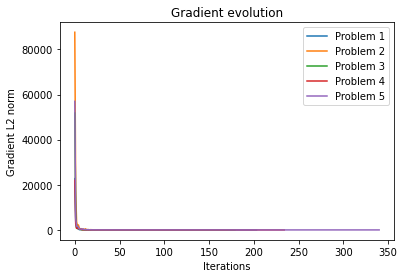

In [20]:
#your code goes here

_ = execute_quadratic_minimization(quadratic_problems, fr_conjugate_direction)

<i>Here is some place for your analysis. How the behavour of algorithm changed after adjustments? What are specific details, differences you noticed with respect to other algorithms behaviour.</i>

<h3 style="background-color: #D3D92B;"><br>Testing on functions of 1-2 variables, Non-quadratic objective<br></h3><br>
<hr><h4 style="background-color: #ADB8FF;"><br>Implement functions to optimise over<br></h4><br>
<i>Place for additional comments and argumentation<i>

In [21]:
#your code goes here

# TODO paste code from problems.create_non_quadratic_problem

np.random.seed(41) # reproducability

# We create N non-quadratic problems
N = 5
non_quadratic_problems = [create_non_quadratic_problem(settings=settings) for _ in range(N)]

<hr><h4 style="background-color: #ADB8FF;"><br>Run 5 tests<br></h4><br>
<p><i>Place for your additional comments and argumentation<i>

In [22]:
def execute_non_quadratic_minimization(problems, direction_method):
    """
    Executes the minimization procedure for the given direction method (e.g. steepest descent)
    for all given non-quadratic problems. Prints the minimization results and plots the gradients.

    :param problems: List of quadratic MinimizationProblem instances that we want to minimize
    :param direction_method: Callable that implements the calculation of the direction for an iteration (e.g. steepest descent)
    """
    
    print("Starting minimization procedure for non-quadratic problems ...")

    problems_grad_norms = []

    for i, problem in enumerate(problems):
        print(f"\n\n### Evaluating non-quadratic problem {i+1} ###\n")
        
        # We perform the actual minimization procedure
        x_minimizer, grad_norms = find_minimizer(problem, direction_method, tolerance=1e-5, max_iter=300_000)
        problems_grad_norms.append(grad_norms)

        # We have two possible local minimizer solutions, choose the one that is closer to the found minimizer
        # Note: Of course, we could easily find a non-quadratic problem for each method where we find the global solution,
        # but we argue that this is just a tedious task which requires to hardcode a lot of problems and we instead opt for
        # considering each local minimizer as a solution. One can easily just increase n and find 5 problems where we find 
        # the global solution for a direction method.
        dist_to_solution_0 = np.sum(np.abs(problem.solution[0] - x_minimizer))
        dist_to_solution_1 = np.sum(np.abs(problem.solution[1] - x_minimizer))
        solution = problem.solution[0] if dist_to_solution_0 < dist_to_solution_1 else problem.solution[1]
        
        # Print the result
        final_printout(problem.x0, solution, x_minimizer, problem.f, problem.calc_gradient_at, tolerance=1e-3)
        print(f"\nIterations required: {len(grad_norms)}")
    
    plot_grad_norms(problems_grad_norms)

# Steepest descent

Starting minimization procedure for non-quadratic problems ...


### Evaluating non-quadratic problem 1 ###

Initial x is :		[-20.]
Optimal x is :		[-10]
Approximated x is :	[-10.00000008]
Is close verificaion: 	[ True]

Function value in optimal point:	-4100.0
Function value in approximated point:   -4100.0
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[-1.91782582e-05]

Is close verificaion:
[ True]

Iterations required: 12


### Evaluating non-quadratic problem 2 ###

Initial x is :		[-20.]
Optimal x is :		[-8]
Approximated x is :	[-7.99999998]
Is close verificaion: 	[ True]

Function value in optimal point:	-682.6666666666666
Function value in approximated point:   -682.6666666666666
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[2.62572257e-06]

Is close verificaion:
[ True]

Iterations required: 7


### Evaluating non-qu

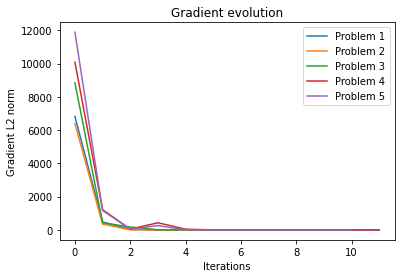

In [23]:
#your code goes here

execute_non_quadratic_minimization(non_quadratic_problems, steepest_descent_direction)

# Quasi-Newton

Starting minimization procedure for non-quadratic problems ...


### Evaluating non-quadratic problem 1 ###

Initial x is :		[-20.]
Optimal x is :		[-10]
Approximated x is :	[-10.]
Is close verificaion: 	[ True]

Function value in optimal point:	-4100.0
Function value in approximated point:   -4100.0
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[0.]

Is close verificaion:
[ True]

Iterations required: 8


### Evaluating non-quadratic problem 2 ###

Initial x is :		[-20.]
Optimal x is :		[-8]
Approximated x is :	[-8.]
Is close verificaion: 	[ True]

Function value in optimal point:	-682.6666666666666
Function value in approximated point:   -682.6666666666666
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[-2.18051355e-10]

Is close verificaion:
[ True]

Iterations required: 9


### Evaluating non-quadratic problem 3 ###

Initia

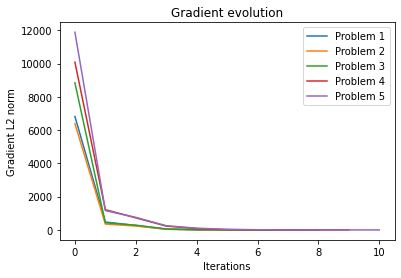

In [24]:
#your code goes here

execute_non_quadratic_minimization(non_quadratic_problems, bfgs_quasi_newton_direction)

# Newton

Starting minimization procedure for non-quadratic problems ...


### Evaluating non-quadratic problem 1 ###

Initial x is :		[-20.]
Optimal x is :		[-10]
Approximated x is :	[-10.]
Is close verificaion: 	[ True]

Function value in optimal point:	-4100.0
Function value in approximated point:   -4100.0
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[0.]

Is close verificaion:
[ True]

Iterations required: 7


### Evaluating non-quadratic problem 2 ###

Initial x is :		[-20.]
Optimal x is :		[-8]
Approximated x is :	[-8.]
Is close verificaion: 	[ True]

Function value in optimal point:	-682.6666666666666
Function value in approximated point:   -682.6666666666665
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[-2.78532752e-12]

Is close verificaion:
[ True]

Iterations required: 8


### Evaluating non-quadratic problem 3 ###

Initia

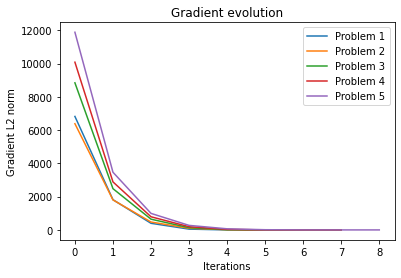

In [25]:
#your code goes here

execute_non_quadratic_minimization(non_quadratic_problems, newton_direction)

# Conjugate method

Starting minimization procedure for non-quadratic problems ...


### Evaluating non-quadratic problem 1 ###

Initial x is :		[-20.]
Optimal x is :		[-10]
Approximated x is :	[-10.00000002]
Is close verificaion: 	[ True]

Function value in optimal point:	-4100.0
Function value in approximated point:   -4100.000000000001
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[-5.5263034e-06]

Is close verificaion:
[ True]

Iterations required: 9


### Evaluating non-quadratic problem 2 ###

Initial x is :		[-20.]
Optimal x is :		[-8]
Approximated x is :	[-7.99999999]
Is close verificaion: 	[ True]

Function value in optimal point:	-682.6666666666666
Function value in approximated point:   -682.6666666666666
Is close verification:	True

Gradient approximation in optimal point is:
[0]

Gradient approximation in approximated point is:
[6.88632539e-07]

Is close verificaion:
[ True]

Iterations required: 6


### Evaluati

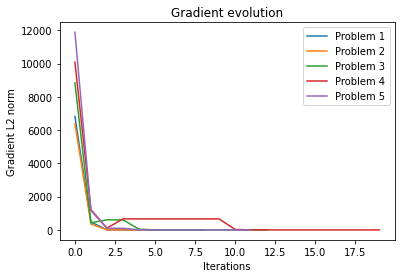

In [26]:
#your code goes here

execute_non_quadratic_minimization(non_quadratic_problems, fr_conjugate_direction)

<i>Here is some place for your analysis. How the behavour of algorithm changed after adjustments? What are specific details, differences you noticed with respect to other algorithms behaviour.</i>

# Main findings:
* We mostly have "nice" problems in terms of scaling, so those don't require any scaling tricks anyways
* Gradient approximation isn't hard and works pretty well, in our case it's significantly slower though, but that is due to our implementation
* Variable scaling doesn't seem to help much when the problem isn't degenerated, but for degenerated problems it works wonders (see showcase)
* Advanced stopping criteria really shine when we have a huge scaling (see showcase), but may require finnicky changes to the tolerance for well-scaled problems (as are ours) to make sure that get we our solution in a certain tolerance range

